In [ ]:
import matplotlib.pyplot as plt

# Sample data: Dictionary where keys are person IDs and values are lists of time intervals
data = {
    1: [(10, 20), (30, 50), (60, 80)],  # For person ID 1, time intervals are (10, 20), (30, 50), and (60, 80)
    2: [(15, 25), (40, 60), (70, 90)],  # For person ID 2, time intervals are (15, 25), (40, 60), and (70, 90)
    3: [(5, 15), (35, 55), (65, 85)]    # For person ID 3, time intervals are (5, 15), (35, 55), and (65, 85)
}

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for person_id, intervals in data.items():
    for interval in intervals:
        start, end = interval
        plt.barh(person_id, width=end-start, left=start, height=0.1, color='#4338CA')

plt.xlabel('Time')
plt.ylabel('Person ID')
plt.title('Time Intervals for Person IDs')
plt.yticks(list(data.keys()), ['Person {}'.format(pid) for pid in data.keys()])

plt.show()


In [ ]:
import os
import json
import pandas as pd

userlog_path = "UserLog"
data = []
pd = {}
vd = {}

# for user_folder in os.listdir(userlog_path):
for folder_number in range(1, 13):
    user_folder = f'P{folder_number}'
    print(f'Processing {user_folder}')
    user_data = {}
    user_folder_path = os.path.join(userlog_path, user_folder)
    if os.path.isdir(user_folder_path):
        folder_number = int(user_folder[1:])
        # if folder_number % 2 == 0:
        for subdir, _, files in os.walk(user_folder_path):
            for file in files:
                file_path = os.path.join(subdir, file)
                if file == 'onboarding.json':
                    pass
                # if not file.lower().startswith('video1') and not file.lower().startswith('video2'): continue
                else:
                    video_data = {}
                    vd_data = {}
                    with open(file_path, 'r') as f:
                        bullet_points_data = json.load(f)
                    video_data['pauseCount'] = bullet_points_data['pauseCount']
                    video_data['forwardCount'] = bullet_points_data['forwardCount']
                    video_data['reverseCount'] = bullet_points_data['reverseCount']
                    video_data['point_count'] = len(bullet_points_data['editHistory'])
                    summary_t = bullet_points_data['summary_t']
                    summary_p = bullet_points_data['summary_p']
                    note_points = [{'point': bpd['point'], 'time_taken': bpd['note_taking_time']} for bpd in bullet_points_data['editHistory']]
                    vd_data['p_id'] = user_folder
                    vd_data['note_points'] = note_points
                    vd_data['summary_p'] = summary_p
                    vd_data['summary_t'] = summary_t
                    if folder_number % 2 == 0:
                        if file.lower().startswith('video1'): 
                            user_data['Baseline'] = video_data
                            vd_data['micronote'] = False
                            if 'video1' not in vd:
                                vd['video1'] = []
                            vd['video1'].append(vd_data)
                        elif file.lower().startswith('video2'): 
                            user_data['NoTeeline'] = video_data
                            vd_data['micronote'] = True
                            if 'video2' not in vd:
                                vd['video2'] = []
                            vd['video2'].append(vd_data)
                    else:
                        if file.lower().startswith('video1'): 
                            user_data['NoTeeline'] = video_data
                            vd_data['micronote'] = True
                            if 'video1' not in vd:
                                vd['video1'] = []
                            vd['video1'].append(vd_data)
                        elif file.lower().startswith('video2'): 
                            user_data['Baseline'] = video_data
                            vd_data['micronote'] = False
                            if 'video2' not in vd:
                                vd['video2'] = []
                            vd['video2'].append(vd_data)
    data.append(user_data)

# print('############ COUNT DATA ############')
# for i, d in enumerate(data):
#     print('----------------------------------------')
#     print(f'User {i+1}')
#     print(d)

print('\n############ VIDEO DATA ############')
for video in vd:
    print(f'--------------\n{video} data...\n--------------')
    for v in vd[video]:
        print('p_id\n----')
        print(f"{v['p_id']}")
        print('micronote\n---------')
        print(f"{v['micronote']}")
        print('summary_t\n---------')
        print(f"{v['summary_t']}")
        print('summary_p\n---------')
        print(f"{v['summary_p']}")
        print(f"Notes:\n------\n{v['note_points']}")
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


chosen_cmap = matplotlib.cm.get_cmap('Paired')
# color_array = [chosen_cmap(i) for i in np.linspace(0, 1, 6)]
# color_hex_array = [matplotlib.colors.to_hex(color) for color in color_array]

# Lists to hold the plot data
labels = []
noteeline_pause = []
noteeline_star_pause = []
noteeline_forward = []
noteeline_star_forward = []
noteeline_reverse = []
noteeline_star_reverse = []

# Populate the lists with data
for user, activities in enumerate(data):
    print(activities)
    labels.append(f'P{user+1}')
    noteeline_pause.append(activities['NoTeeline']['pauseCount'])
    noteeline_star_pause.append(activities['Baseline']['pauseCount'])
    noteeline_forward.append(activities['NoTeeline']['forwardCount'])
    noteeline_star_forward.append(activities['Baseline']['forwardCount'])
    noteeline_reverse.append(activities['NoTeeline']['reverseCount'])
    noteeline_star_reverse.append(activities['Baseline']['reverseCount'])

# Width of the bars
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(10, 6))

# Stacked bar for 'noteeline'
bar1 = plt.bar(r1, noteeline_pause, color=chosen_cmap(1), width=barWidth, edgecolor='white', label='Pause (NoTeeline)')
bar2 = plt.bar(r1, noteeline_forward, bottom=noteeline_pause, color=chosen_cmap(3), width=barWidth, edgecolor='white', label='Seek Forward (NoTeeline)')
bar3 = plt.bar(r1, noteeline_reverse, bottom=[i+j for i,j in zip(noteeline_pause, noteeline_forward)], color=chosen_cmap(5), width=barWidth, edgecolor='white', label='Seek Backward (NoTeeline)')

# Stacked bar for 'noteeline*'
bar4 =plt.bar(r2, noteeline_star_pause, color=chosen_cmap(0), width=barWidth, edgecolor='white', label='Pause (Baseline)')
bar5 = plt.bar(r2, noteeline_star_forward, bottom=noteeline_star_pause, color=chosen_cmap(2), width=barWidth, edgecolor='white', label='Seek Forward (Baseline)')
bar6 = plt.bar(r2, noteeline_star_reverse, bottom=[i+j for i,j in zip(noteeline_star_pause, noteeline_star_forward)], color=chosen_cmap(4), width=barWidth, edgecolor='white', label='Seek Backword (Baseline)')

# Add xticks on the middle of the group bars
# plt.xlabel('User', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(labels))], labels)
plt.legend(loc="lower left", ncol=2, bbox_to_anchor=(0.18, -0.3), frameon=False) # https://stackoverflow.com/a/54870844
plt.yticks([])  

# Create legend & Show graphic
# plt.legend()
plt.box(False)
plt.savefig('video_log_dist.pdf', bbox_inches="tight")
plt.show()


In [ ]:
import matplotlib.pyplot as plt


noteeline_cnt = []
baseline_cnt = []
x = []
labels = []

# Populate the lists with data
for user, activities in enumerate(data):
    # print(activities)
    labels.append(f'P{user+1}')
    x.append(user+1)
    noteeline_cnt.append(activities['NoTeeline']['point_count'])
    baseline_cnt.append(activities['Baseline']['point_count'])
plt.figure(figsize=(10, 6))

# Plot the first line with x and y1 values
plt.plot(x, noteeline_cnt, label='NoTeeline', marker='o', color=chosen_cmap(3))

# Plot the second line with x and y2 values
plt.plot(x, baseline_cnt, label='Baseline', marker='o', color=chosen_cmap(9))


# Adding the legend, which uses the labels defined in the plt.plot() method
plt.legend(loc="lower left", bbox_to_anchor=(0.3, -0.2), ncol = 2, frameon=False)

plt.xticks([r+1 for r in range(len(labels))], labels)
# plt.xlabel('X-axis Label')
plt.ylabel('# of note points')
plt.box(False)
plt.savefig('note_count_dist.pdf', bbox_inches="tight")
# Finally, show the plot
plt.show()


In [8]:
import os
import json
import math
import pandas as pd

userlog_path = "UserLog"
user_dict = {}

for user_folder in os.listdir(userlog_path):
    print(f'Processing {user_folder}')
    pd_dict = {}
    user_folder_path = os.path.join(userlog_path, user_folder)
    if os.path.isdir(user_folder_path):
        folder_number = int(user_folder[1:])
        for subdir, _, files in os.walk(user_folder_path):
            for file in files:
                file_path = os.path.join(subdir, file)
                if file == 'onboarding.json':
                    with open(file_path, 'r') as f:
                        onboarding_data = json.load(f)
                    pd_dict['ob_session'] = onboarding_data
                else:
                    with open(file_path, 'r') as f:
                        bullet_points_data = json.load(f)
                    
                    if folder_number % 2 == 0:
                        video_prefix = 'video2'
                    else:
                        video_prefix = 'video1'

                    if file.lower().startswith(video_prefix):
                        pd_dict['note_taking_time'] = [math.ceil(bpd['note_taking_time']/1000) for bpd in bullet_points_data['editHistory']]
                        pd_dict['video_data'] = [
                            {
                                'point': bpd['point'],
                                'expanded': bpd['edit'][-1][-1]['e_point']
                            }
                            for bpd in bullet_points_data['editHistory']
                        ]
                        user_dict[user_folder] = pd_dict

print('\n############ USER DATA ############')
for user in user_dict:
    print(f'{user} Data\n----------------')
    print('Onboarding Session\n------------------')
    print(f"{user_dict[user]['ob_session']}")
    print('Note Taking Time\n----------------')
    print(f"{user_dict[user]['note_taking_time']}")
    print('Notes and Corresponding Expansions\n----------------------------------')
    print(f"{user_dict[user]['video_data']}")
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()


Processing P8
Processing P7

############ USER DATA ############
P8 Data
----------------
Onboarding Session
------------------
[{'id': 0, 'note': 'meta quest 3 has physical wheel for adjustment whereas there are literal motors inside apple pro no manual adjustment needed, it will sense via cameras and automatically adjust based on your eyes\n', 'keypoints': ['meta quest 3 wheel bottom optics', 'apple no phys wheel', 'camera adjustment with eyes'], 'transcript': "look at something basic like meta Quest 3 has this little wheel on the bottom that you can use to adjust the Optics inside well Apple didn't want to put this little physical wheel that you have to manually do instead there are literal Motors inside a vision pro it'll use the cameras to look at your eyes then adjust them the lenses so it matches you perfectly for the first time that you put it on"}, {'id': 1, 'note': 'Food is converted to ATP by mitochondrias. Mitochondrias have 2 membranes, inner and outer separated by the int

/tmp/ipykernel_1842/3907041581.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')  # Choose a colormap ('Blues' is an example)


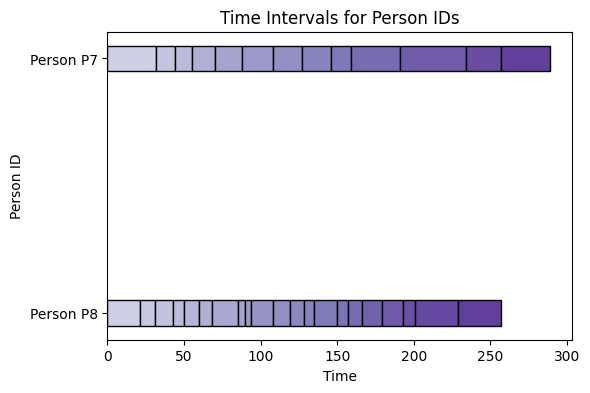

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

data = {user:user_dict[user]['note_taking_time'] for user in user_dict}

# Plotting
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
cmap = cm.get_cmap('Purples')  # Choose a colormap ('Blues' is an example)

for person_id, time_differences in data.items():
    start_time = 0
    num_bars = len(time_differences)
    # Adjust the range of normalized indices to avoid lightest shades
    color_indices = [0.3 + 0.5 * i / (num_bars - 1) for i in range(num_bars)]
    for i, time_diff in enumerate(time_differences):
        end_time = start_time + time_diff
        bar_color = cmap(color_indices[i])  # Get color from colormap based on normalized index
        plt.barh(person_id, width=time_diff, left=start_time, height=0.1, color=bar_color, edgecolor='black')
        start_time = end_time

plt.xlabel('Time')
plt.ylabel('Person ID')
plt.title('Time Intervals for Person IDs')
plt.yticks(list(data.keys()), ['Person {}'.format(pid) for pid in data.keys()])
plt.show()

# JS function `call_gpt` converted to python

In [12]:
def get_formatted_prompt_string():
    onboardings = [] # Assign values here...

    # Simulating the check for existing onboardings
    take_onboarding_into_prompt = bool(onboardings)

    # Filter out onboardings with non-empty notes and non-empty keypoints
    new_onboardings = [onboarding for onboarding in onboardings if onboarding['note'] and all(onboarding['keypoints'])]

    # Update take_onboarding_into_prompt based on the filtered onboardings
    if not new_onboardings:
        take_onboarding_into_prompt = False

    prompt_string = "I want you to act as a personalized note-taking assistant. Users will give you a keypoint and the youtube transcript. " + \
                    "Your task is to expand the keypoint into a note point, by taking additional context from the transcript. The note should be a full sentence in simple english. " + \
                    "Follow these rules:\n1. Resolve any typos or grammatical mistakes that arise in the keypoint.\n2. The note should not be longer than 1 sentence. " + \
                    "3. Remember that the keypoint can be very abstract and as short as an abbreviation. Use the transcript to get additional information to ensure a good quality note expansion.\n" + \
                    "4. Just write a single note point, users will request repeatedly for new points they want to add.\n" + \
                    "5. Write it in a way a user would write in a notepad. Do not use sentences such as 'This video talks about...', 'The speaker explains..' etc."

    if take_onboarding_into_prompt:
        prompt_string += "\nMake sure that the note aligns with the user's writing style, so that they can read it easily. Use the same writing style as shown below.\n" + \
                         "Here are three examples:\n"

        for onboarding in new_onboardings:
            prompt_string += "Transcript: ..." + onboarding['transcript'] + "...\n" + \
                             "Keypoint: " + ", ".join(onboarding['keypoints']) + "\n" + \
                             "Note: " + onboarding['note'] + "\n\n"

        prompt_string += "The keypoint refers to the high-level keypoint provided by the user and your task is to write a full 'Note' point. Make sure that your expanded note point matches the writing style of 'Note' in the provided examples."

    return prompt_string

In [13]:
WINDOW_SIZE = 20000

def expand_point(point, transcript):
    expanded_point = {'point': point['point'], 'transcript': []}

    for line in transcript:
        tr_offset = line['offset']
        tr_end = line['offset'] + line['duration']
        right = point['created_at'] * 1000.0  # converting to ms to match transcript time
        left = right - WINDOW_SIZE  # Assuming WINDOW_SIZE is defined elsewhere

        # there is partial or full overlapping between point and transcript
        if not (right < tr_offset) and not (left > tr_end):
            expanded_point['transcript'].append(line['text'])

    return expanded_point

In [ ]:
'''
    Still incomplete
    Needs some syntactical corrections...
'''

import openai # Might need to install this package

async def call_gpt(points, transcription):
    prompt_string = get_formatted_prompt_string()

    expansion = []
    for point in points:
        if len(point['history']) > point['expand']:
            expansion.append({'point': point['point'], 'expansion': point['history'][point['expand']], 'old': True})
        else:
            point_to_be_expanded = point['history'][point['expand'] - 1]
            expanded_point = expand_point({'point': point_to_be_expanded, 'created_at': point['created_at'], 'utc_time': point['utc_time']}, transcription)
            transcript = ".".join(expanded_point['transcript'])
            prompt = "Expand the provided keypoint into a one sentence note.\n" + \
                     "Transcript: ..." + transcript + "...\n" + \
                     "Keypoint: " + expanded_point['point'] + "\n" + \
                     "Note:"

            print('calling expansion from', prompt)

            res = await openai.ChatCompletion.create(
                messages=[{'role': 'system', 'content': prompt_string}, {'role': 'user', 'content': prompt}],
                model="gpt-4-1106-preview",
                temperature=0.5
            )

            if res.choices[0].message.content is not None:
                expansion.append({'point': point['point'], 'expansion': res.choices[0].message.content, 'old': False})

    return expansion